In [89]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np

1. Чтение данных из файла

In [31]:
student_scores = pd.read_csv('data/student_scores.csv', sep=',')
student_scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


2. Статистическая информация о используемых данных (количество, min, max, среднее) по каждому из столбцов

In [32]:
student_scores.describe().loc[['count', 'min', 'max', 'mean']]

,Hours,Scores
count,25.000,25.00
min,1.100,17.00
max,9.200,95.00
mean,5.012,51.48


4. Вычисление параметров регрессионной прямой методом наименьших квадратов

   Регрессия имеет вид
   
   $ f(x) = \omega_0 + \omega_1 x $

   Задача: найти такие $ \omega_0 $ и $ \omega_1 $, что функция MSE

   $ MSE = \frac{1}{n} \sum_{i=0}^{n} (y_i - f(x_i)) $ или $ MSE = \frac{1}{n} \sum_{i=0}^{n} (y_i - \omega_0 - \omega_1 x) $
   
   (среднеквадратическая ошибка) будет принимать наименьшее значение.

   Находя минимумы по  $ \omega_0 $ и $ \omega_1 $ и решая полученную систему получим точное решение:
   $$ \omega_1 = \frac{\frac{\sum_{i=0}^{n} x_i \sum_{i=0}^{n} y_i}{n} - \sum_{i=0}^{n}(y_i * x_i)}{\frac{(\sum_{i=0}^{n} x_i)^2}{n} - \sum_{i=0}^{n} x_i^2} $$
   $$ \omega_0 = \frac{1}{n}(\sum_{i=0}^{n} y_i - \omega_1 * \sum_{i=0}^{n} x_i) $$

In [73]:
x = student_scores.Hours
y = student_scores.Scores
n = x.size

In [74]:
w1 = (x.sum() * y.sum() / n - np.dot(x, y))/(((x.sum())**2)/n - (x**2).sum())
w0 = 1/n * (y.sum() - w1 * x.sum())

In [85]:
def get_regr_y(x):
    return w0 + w1*regression_x
def get_regr_x(y):
    return (y - w0)/w1

In [86]:
x_regr = np.linspace(x.min(), x.max(), 2)
y_regr = get_regr_y(x_regr)

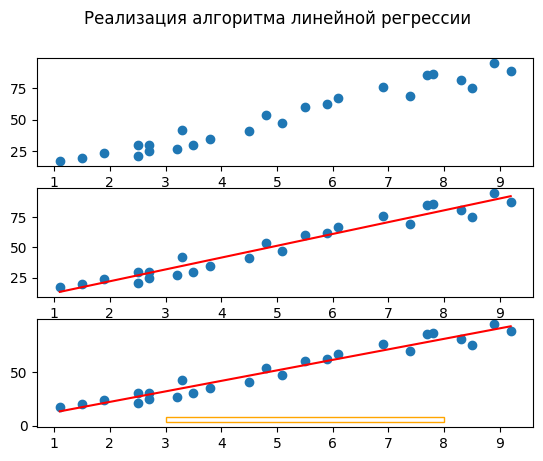

In [114]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Реализация алгоритма линейной регрессии')
ax1.scatter(student_scores.Hours, student_scores.Scores)

ax2.scatter(student_scores.Hours, student_scores.Scores)
ax2.plot(x_regr, y_regr, 'r')

ax3.scatter(student_scores.Hours, student_scores.Scores)
ax3.plot(x_regr, y_regr, 'r')
# ax3.add_patch(patches.Rectangle((student_scores.iloc[10][0], get_regr_y(student_scores.iloc[10][0])), get_regr_x(student_scores.iloc[10][1]), student_scores.iloc[10][1], edgecolor='orange', facecolor='none'))
ax3.add_patch(patches.Rectangle((3, 3), 5, 5, edgecolor='orange', facecolor='none'))

# for i in range(n):
#     ax3.add_patch(patches.Rectangle((student_scores.iloc[i][0], get_regr_y(student_scores.iloc[i][0])), get_regr_x(student_scores.iloc[i][1]), student_scores.iloc[i][1], edgecolor='orange', facecolor='none'))

Введите "1" => ось X - Hours, "0" => ось X - Scores:  0


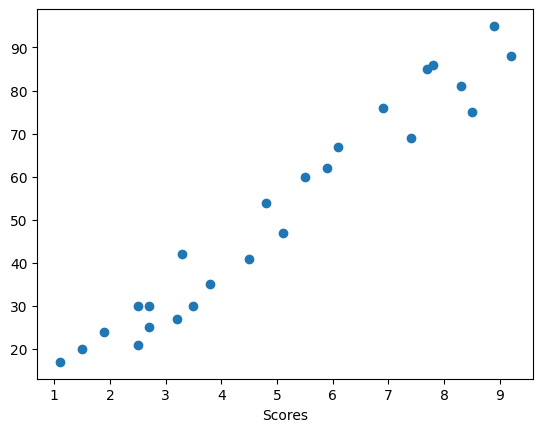

In [60]:
x = bool(input('Введите "1" => ось X - Hours, "0" => ось X - Scores: '))
if x:
    plt.xlabel(student_scores.columns[0])
    plt.xlabel(student_scores.columns[1])
    plt.scatter(student_scores.Hours, student_scores.Scores)
else:
    plt.xlabel(student_scores.columns[1])
    plt.xlabel(student_scores.columns[0])
    plt.scatter(student_scores.Scores, student_scores.Hours)

In [100]:
for a in range(n):
    print(student_scores.iloc[a][1])

21.0
47.0
27.0
75.0
30.0
20.0
88.0
60.0
81.0
25.0
85.0
62.0
41.0
42.0
17.0
95.0
30.0
24.0
67.0
69.0
30.0
54.0
35.0
76.0
86.0


C:\Users\PAVILION\AppData\Local\Temp\ipykernel_13372\2790470491.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(student_scores.iloc[a][1])
